In [1]:
!nvidia-smi

Thu Jan 30 09:14:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [11]:
!ls

data  data.yaml  runs  YOLO_OBJECT_DETECTION.ipynb  yolov8s.pt


In [14]:
%cd /content/drive/MyDrive/yolo

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/yolo
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [15]:

!ls runs/detect/train/

args.yaml  weights


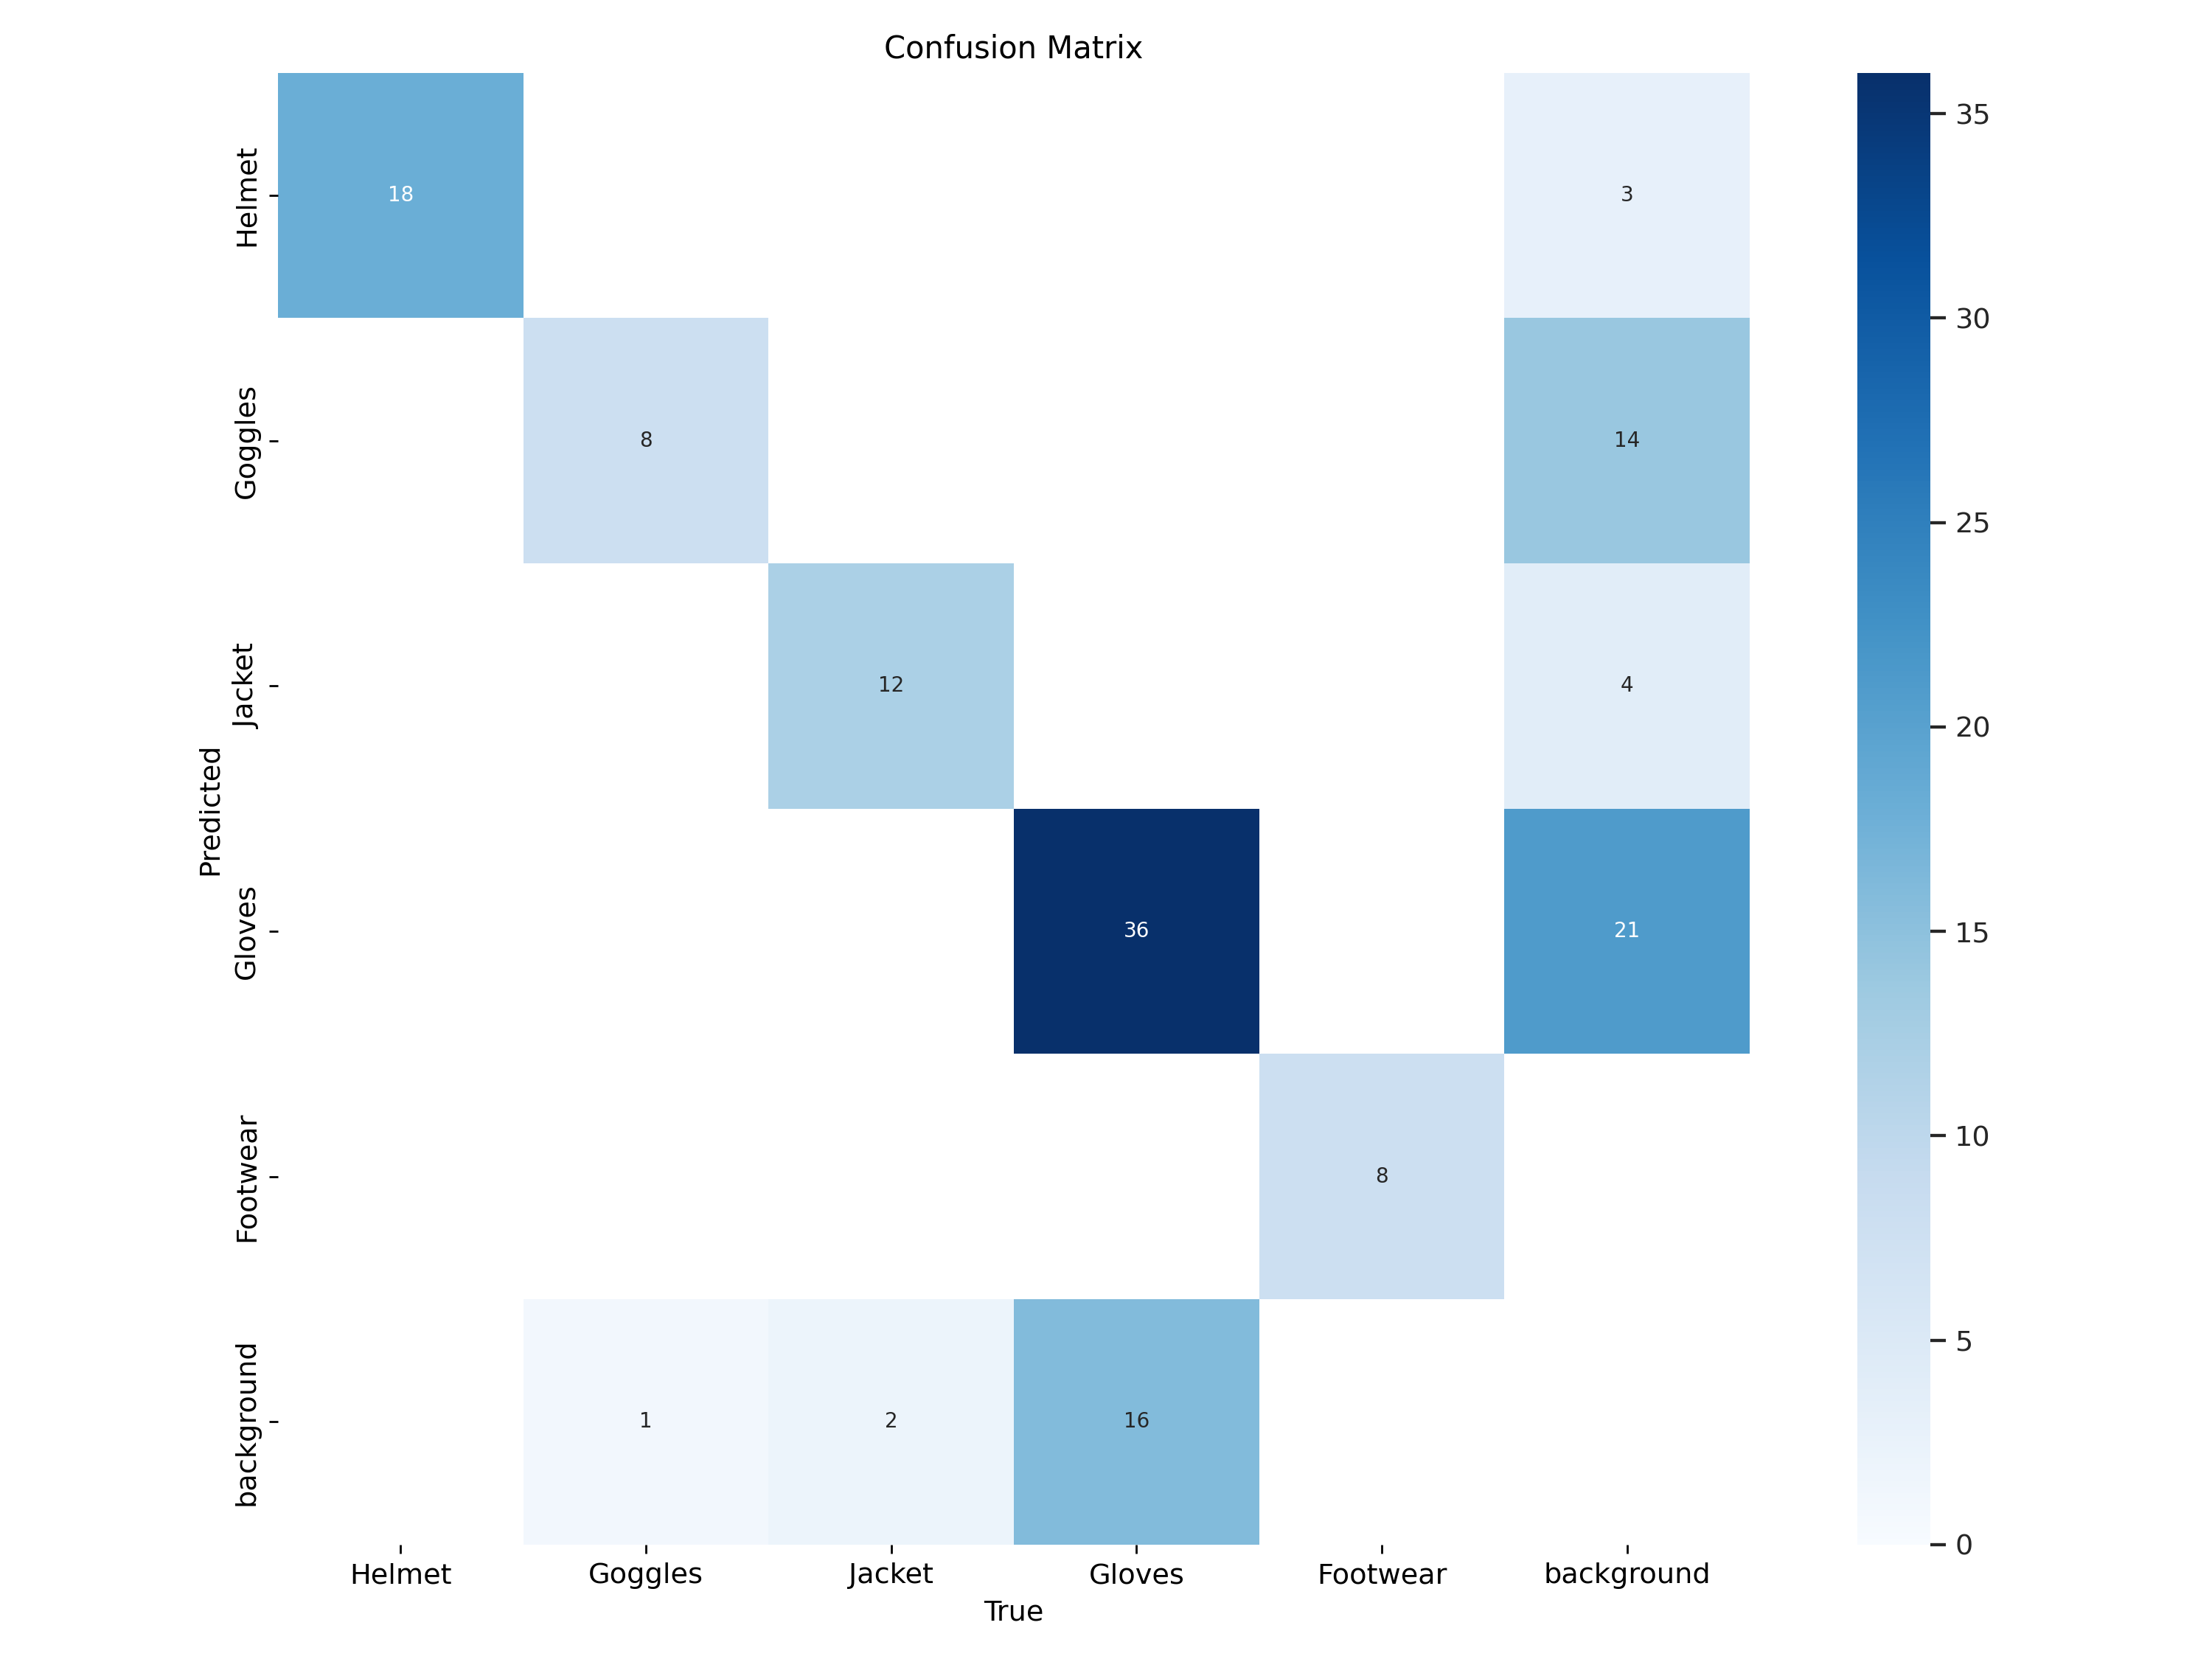

In [18]:
from IPython.display import display, Image
Image(filename='runs/detect/train4/confusion_matrix.png', width=600)

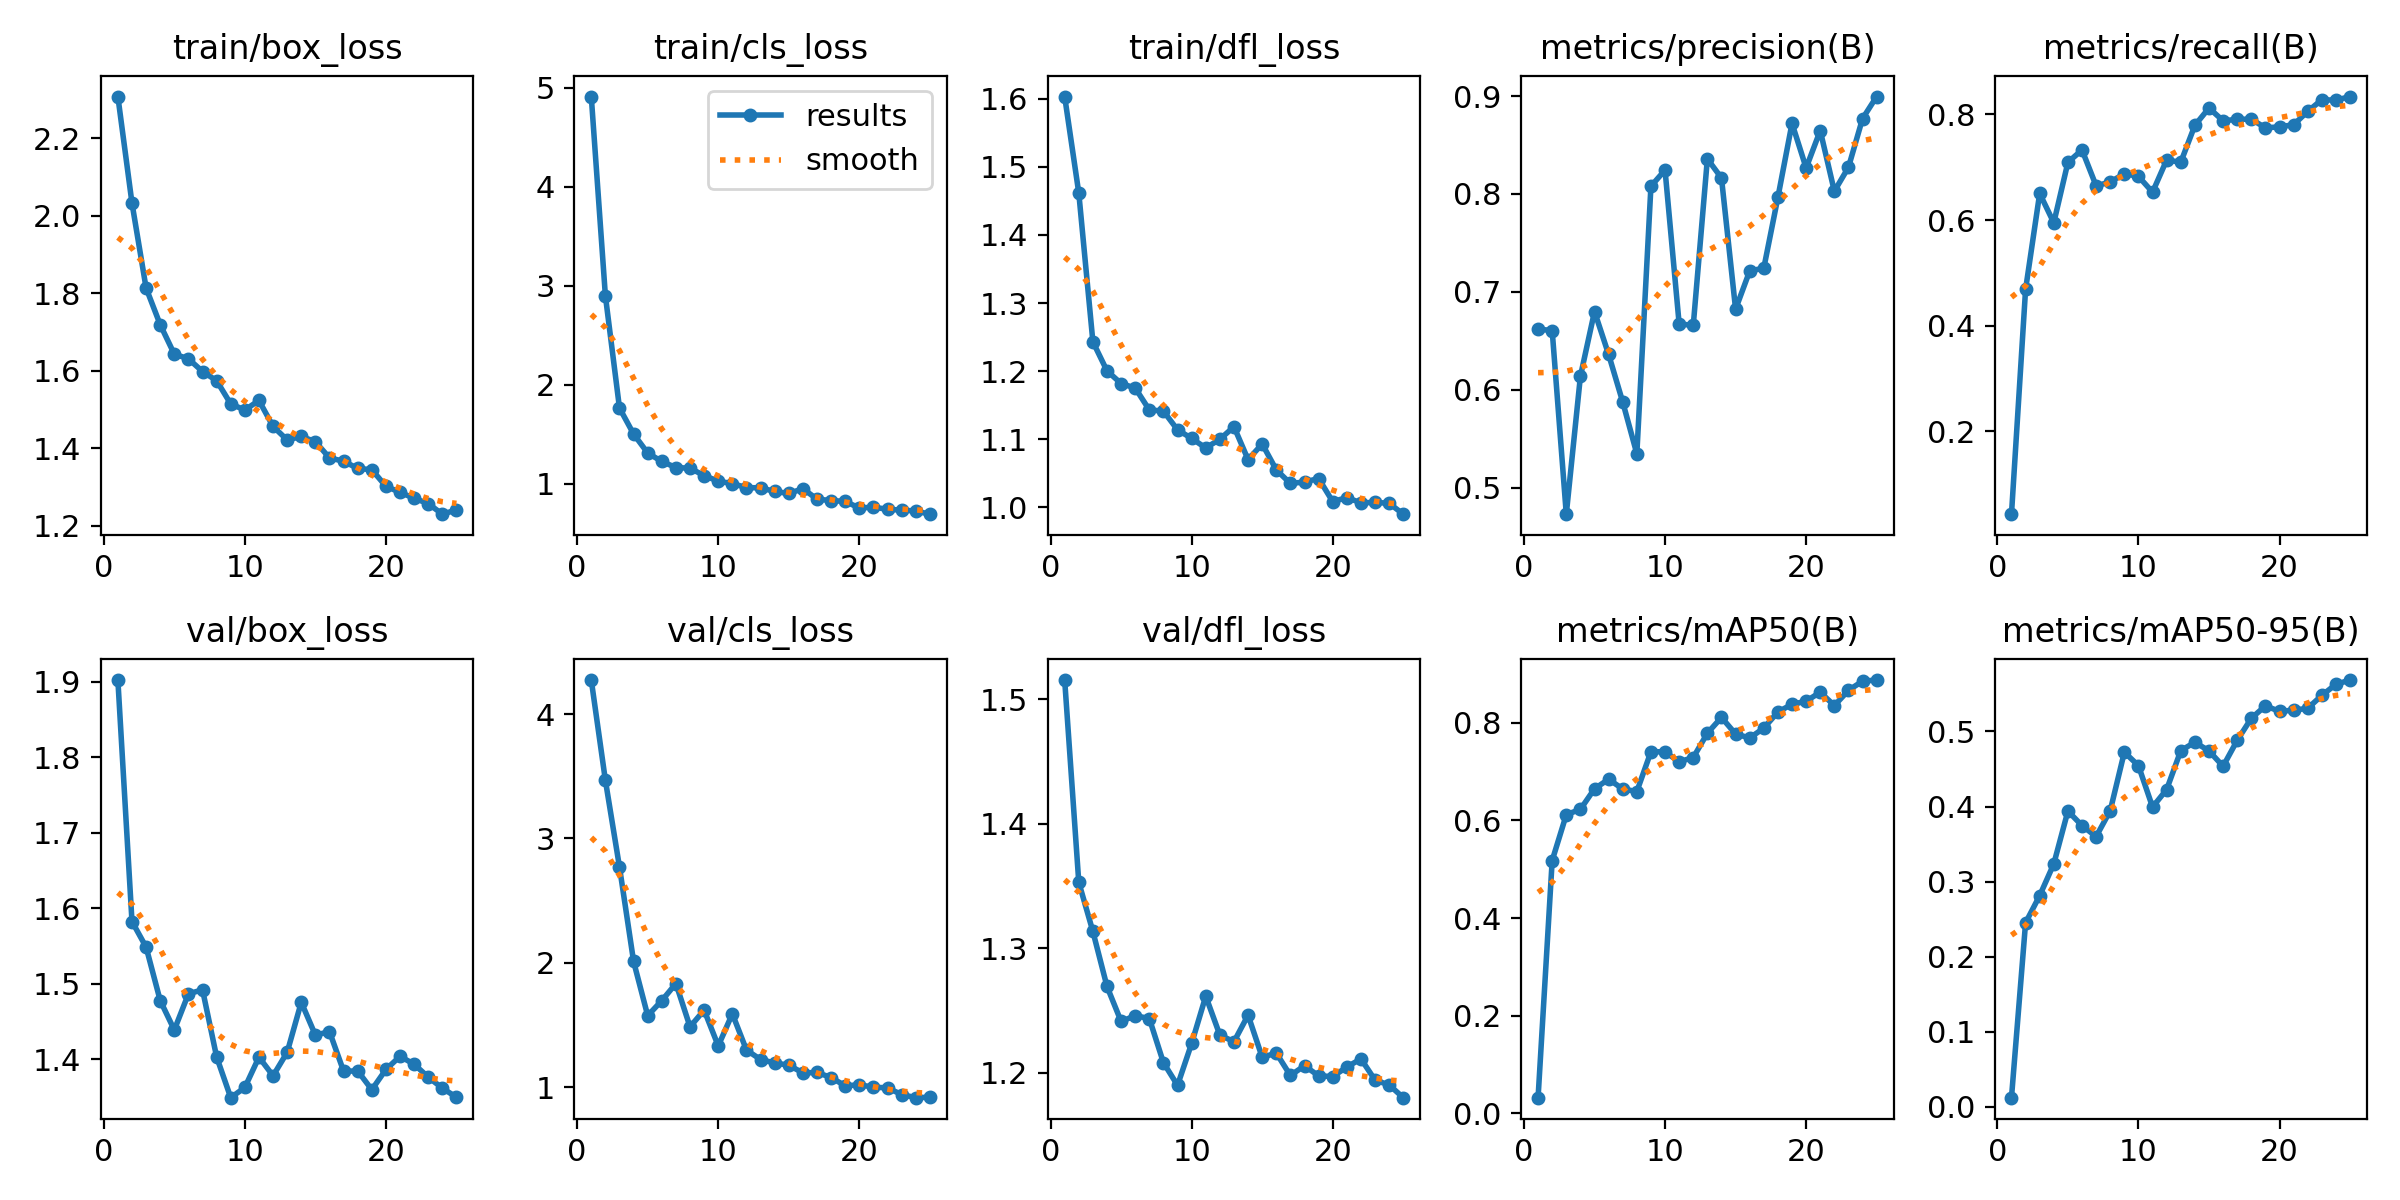

In [19]:
Image(filename='runs/detect/train4/results.png', width=600)

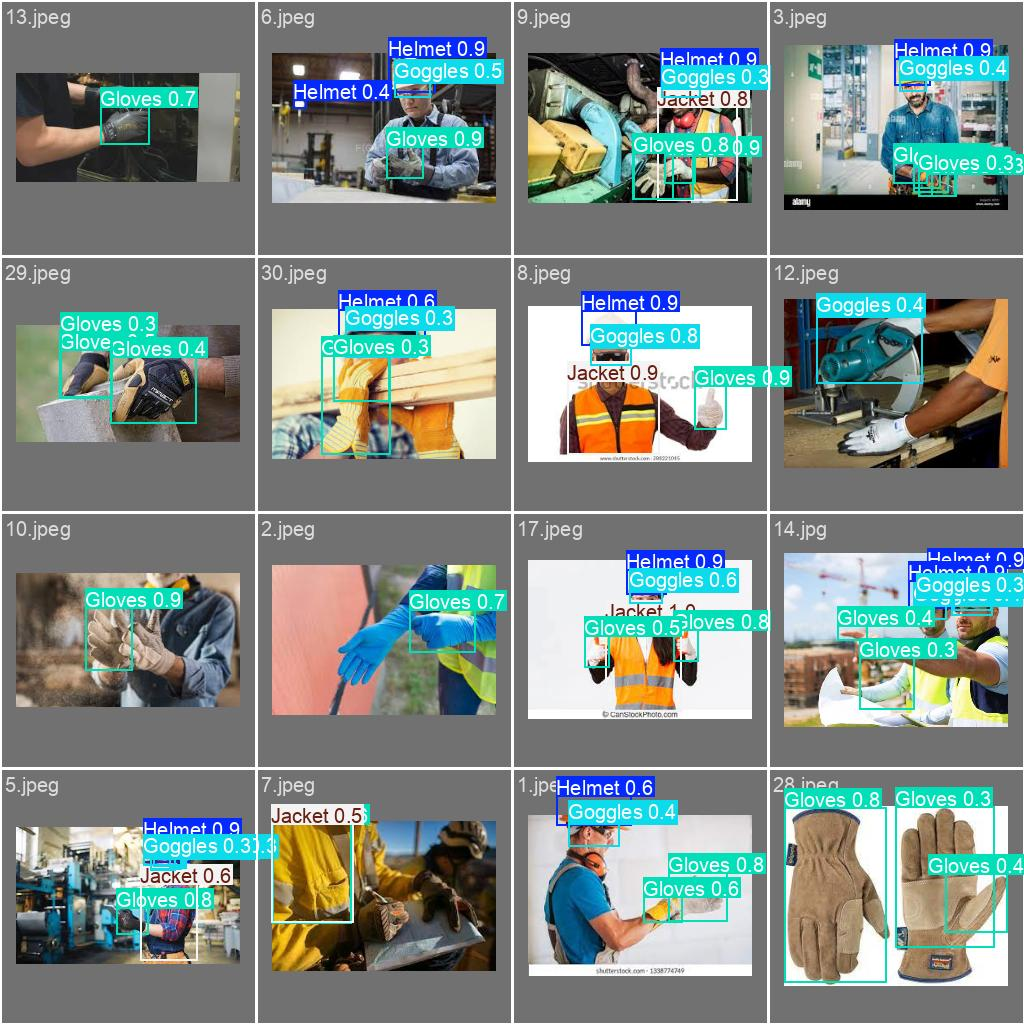

In [20]:
Image(filename='runs/detect/train4/val_batch0_pred.jpg', width=600)

Validate Custom Model

In [22]:
!yolo task=detect mode=val model=runs/detect/train4/weights/best.pt data=data.yaml

Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolo/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.52it/s]
                   all         31        101      0.878      0.809      0.876      0.562
                Helmet         17         18      0.914          1      0.995      0.695
               Goggles          9          9      0.843      0.602      0.749      0.449
                Jacket         13         14       0.83      0.857      0.911      0.704
                Gloves         30         52      0.813      0.586       0.73      0.417
              Footwear          4          8      0.987          1      0.995      0.545
Speed: 0.5ms preprocess, 11.4ms inference, 

Inference with Custom Model

In [23]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source=data/test/images

Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/yolo/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 2 Glovess, 48.3ms
image 2/31 /content/drive/MyDrive/yolo/data/test/images/10.jpeg: 160x224 2 Glovess, 45.2ms
image 3/31 /content/drive/MyDrive/yolo/data/test/images/11.jpeg: 224x224 2 Glovess, 8.6ms
image 4/31 /content/drive/MyDrive/yolo/data/test/images/12.jpeg: 192x224 1 Goggles, 2 Glovess, 8.6ms
image 5/31 /content/drive/MyDrive/yolo/data/test/images/13.jpeg: 128x224 1 Gloves, 45.5ms
image 6/31 /content/drive/MyDrive/yolo/data/test/images/14(1).jpeg: 224x224 1 Gloves, 10.0ms
image 7/31 /content/drive/MyDrive/yolo/data/test/images/14.jpg: 192x224 2 Helmets, 3 Goggless, 2 Glovess, 8.4ms
image 8/31 /content/drive/MyDrive/yolo/data/test/images/15.jpeg: 224x224 1 Jacket, 3 Glovess, 9.0ms
image 9/31 /content/drive/MyDrive/yolo/data/te

**NOTE:** Let's take a look at few results.

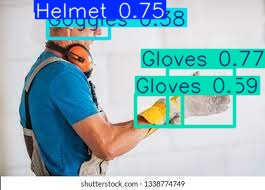

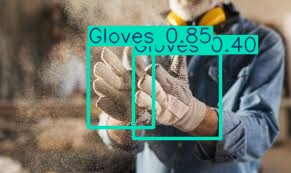

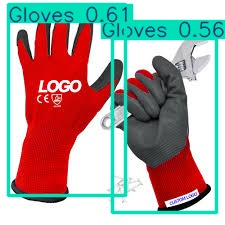

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")